In [2]:
using CABLAB
using ImageMagick

#### Open a datacube and obtain a handle to its data

In [3]:
cubepath="/Net/Groups/BGI/scratch/DataCube/v1/brockmann-consult.de/datacube/"
c=Cube(cubepath)

CABLAB.CubeAPI.Cube("/Net/Groups/BGI/scratch/DataCube/v1/brockmann-consult.de/datacube/",CABLAB.CubeAPI.CubeConfig(2011-01-01T00:00:00,2000-01-01T00:00:00,2000-01-01T00:00:00,1440,:None,8,720,"","NETCDF4_CLASSIC",0.25,"0.1",0,false,0),UTF8String["BHR_VIS","BurntArea","DHR_VIS","Emission","Ozone","Precip","SoilMoisture","t2m"],DataStructures.OrderedDict("BHR_VIS"=>1,"BurntArea"=>2,"DHR_VIS"=>3,"Emission"=>4,"Ozone"=>5,"Precip"=>6,"SoilMoisture"=>7,"t2m"=>8),0)

In [7]:
cdata=getCubeData(c,variable=["Precip","Emission"],time=(DateTime(2003,1,1),DateTime(2003,1,1)));

Interact.Slider{Int64}(Signal{Int64}(1, nactions=0),"Time Step",1,1:1,true)

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Precip",Interact.OptionDict(Any["Precip","Emission"],Dict{Any,Any}("Emission"=>2,"Precip"=>1)),Any[],Any[])

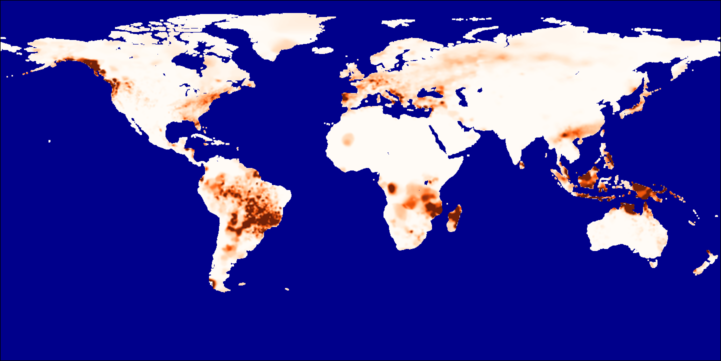

In [8]:
plotMAP(cdata,dmin=0.f0,dmax=10.f0)

#### Read a full map at a single time step

In [ ]:
x=joinVars(getCubeData(c,["Ozone","SoilMoisture"],(DateTime(2003,1,1),DateTime(2003,2,1)),(-90,90),(-180,180)));

#### Read the full time series in a specific area only

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.Slider{Float64}(Signal{Float64}(7.25, nactions=0),"Longitude",7.25,5.0:0.25:9.75,true)

Interact.Slider{Float64}(Signal{Float64}(7.5, nactions=0),"Latitude",7.5,5.25:0.25:10.0,true)

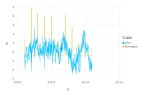

In [10]:
cdata=getCubeData(c,variable=["t2m","Emission"],longitude=(5,10),latitude=(5,10))
plotTS(map(normalize,cdata))